# 第5讲 统计推断基础


In [4]:
##数据说明：本数据是
##名称	中文含义
#dis_name   小区名称
#rate       房价同比增长率
house_price_gr<-read.csv("data/house_price_gr.csv",fileEncoding="GBK")
attach(house_price_gr)

head(house_price_gr)

dis_name,rate
东城区甘南小区,0.16974719
东城区察慈小区,0.16548436
东城区胡家园小区,0.14135830
东城区台基厂小区,0.06319671
东城区青年湖小区,0.10152769
东城区小黄庄小区,0.06846723


In [6]:
summary(rate)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.02954 0.08003 0.10490 0.11010 0.14010 0.24370 

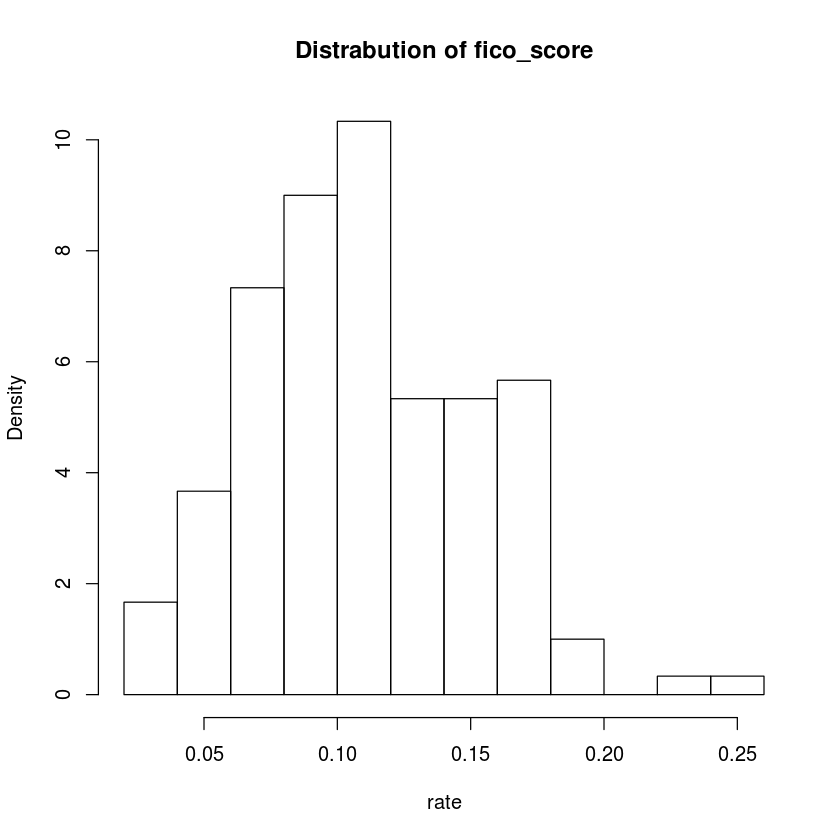

In [7]:
hist(rate,prob=T,main="Distrabution of fico_score")

In [8]:
lines(density(rate))

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


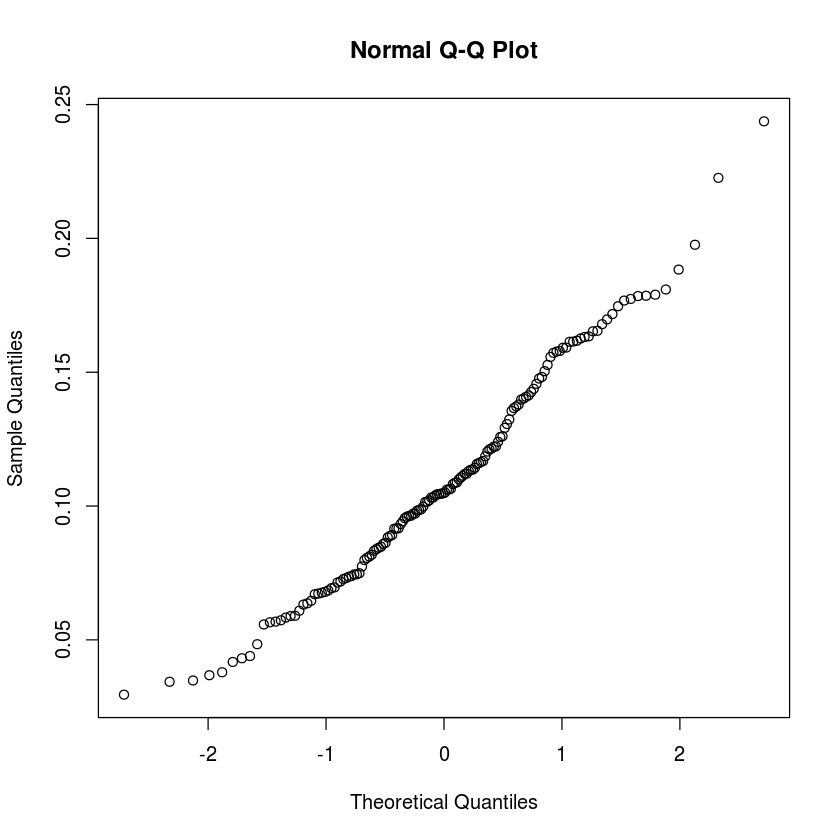

In [9]:
qqnorm(rate);

In [10]:
qqline(rate)

ERROR: Error in int_abline(a = a, b = b, h = h, v = v, untf = untf, ...): plot.new has not been called yet


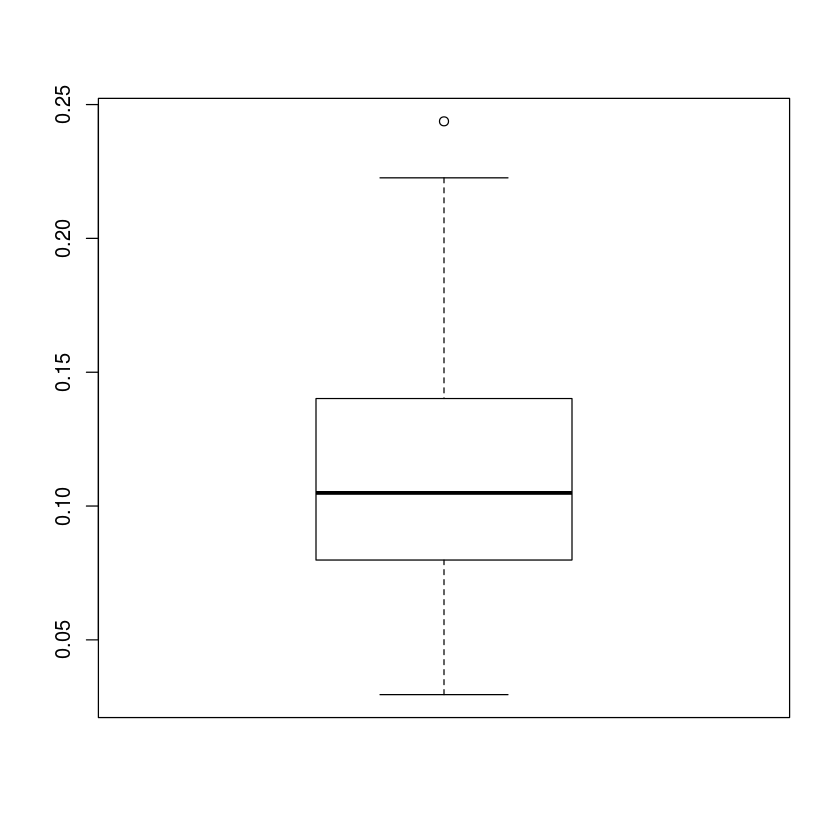

In [11]:
boxplot(rate)

In [12]:
#如果你要求的只是95%的置信度的话，t.test(),这个函数本来是用于做单样本T检验的
t.test(rate)


	One Sample t-test

data:  rate
t = 32.612, df = 149, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.1033923 0.1167297
sample estimates:
mean of x 
 0.110061 


In [14]:
rate_mean<-mean(rate)
se<- sd(rate)/sqrt(length(rate))
lb<-rate_mean-1.98*se
ub<-rate_mean+1.98*se
c(lb,ub)

[1] 0.1033788 0.1167432

In [15]:
#如果要求任意置信度下的置信区间的话，就需要自己编一个函数了。
confint<-function(x,sigma=-1,alpha=0.05)
{
  n<-length(x)
  xb<-mean(x)
  tmp<-(sd(x)/sqrt(n))*qt(1-alpha/2,n-1);df<- n-1
  data.frame(mean=xb,df=df,LB=xb-tmp,UB=xb+tmp)
}

In [16]:
confint(rate,0.05)  

mean,df,LB,UB
0.110061,149,0.1033923,0.1167297


##   5.2 假设检验与单样本T检验

In [17]:
#一般认为FICO高于690的客户信誉较高，请检验该产品的客户整体信用是否高于690
t.test(rate,mu=0.1)


	One Sample t-test

data:  rate
t = 2.9812, df = 149, p-value = 0.003355
alternative hypothesis: true mean is not equal to 0.1
95 percent confidence interval:
 0.1033923 0.1167297
sample estimates:
mean of x 
 0.110061 


In [19]:
##数据说明：本数据是一份汽车贷款违约数据
##名称	中文含义
#id	id
#Acc	是否开卡(1=已开通)
#avg_exp	月均信用卡支出（元）
#avg_exp_ln	月均信用卡支出的自然对数
#gender	性别(男=1)
#Age	年龄
#Income	年收入（万元）
#Ownrent	是否自有住房（有=1；无=0)
#Selfempl	是否自谋职业(1=yes, 0=no)
#dist_home_val	所住小区房屋均价(万元)
#dist_avg_income	当地人均收入
#high_avg	高出当地平均收入
#edu_class	教育等级：小学及以下开通=0，中学=1，本科=2，研究生=3
#—————————————————————————————————————————————————————————————————————————————————————————————————————————————###

#导入数据和数据清洗
creditcard_exp<-read.csv("data/creditcard_exp.csv")
creditcard_exp<-na.omit(creditcard_exp)

head(creditcard_exp)

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
1,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.93279,1600,0.10236053,3
2,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.79632,1024,0.05118421,2
4,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.27563,1681,0.19721842,3
5,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.34647,784,0.06267632,2
6,67,1,816.03,6.704451,1,41,10.03015,0,1,119.76,10.33226,1681,-0.30211316,3
7,97,1,1151.15,7.048517,1,33,11.70575,1,0,38.90,11.52605,1089,0.17969737,3


##   5.3 两样本T检验